### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(42)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.13.1'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

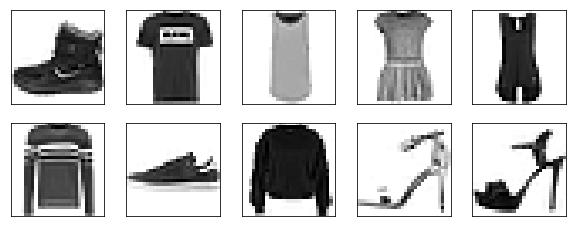

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [19]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#model.add(tf.keras.layers.Dense(10,input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [14]:
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


### Execute the model using model.fit()

In [21]:
model.fit(trainX, trainY, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 14.5063
Epoch 2/20
60000/60000 [==============================] - 3s 55us/sample - loss: 14.5063
Epoch 3/20
60000/60000 [==============================] - 3s 52us/sample - loss: 14.5063
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 14.5063
Epoch 5/20
60000/60000 [==============================] - 3s 52us/sample - loss: 14.5063
Epoch 6/20
60000/60000 [==============================] - 3s 52us/sample - loss: 14.5063
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 14.5063
Epoch 8/20
60000/60000 [==============================] - 3s 54us/sample - loss: 14.5063
Epoch 9/20
60000/60000 [==============================] - 3s 53us/sample - loss: 14.5063
Epoch 10/20
60000/60000 [==============================] - 3s 56us/sample - loss: 14.5063
Epoch 11/20
60000/60000 [==============================] - 3s 57us/sample - loss: 14.5063
Epoch 12/20
60000/6

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [22]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 10
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [23]:
#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

In [25]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

### Execute the model

In [28]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5571
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4839
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4688
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4623
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4533
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4519
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4480
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4467
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4441
Epoch 10/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.44290s - loss: 0.44


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [29]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [31]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4090
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4028
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4009
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4015
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.40040s - l
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4006
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3970
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3991
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4005
Epoch 10/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3999


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [33]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 3rd hidden layer
model1.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [34]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [37]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

## Review model

In [38]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total para

### Run the model

In [39]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 2.3029
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 2.2980
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 2.2923
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 2.2805
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 2.2439
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 1.9877
Epoch 7/10
60000/60000 [==============================] - 6s 94us/sample - loss: 1.3323
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.9269
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.7490
Epoch 10/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.6715
